In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns # statistical data visualization
get_ipython().run_line_magic('matplotlib', 'inline')
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv("/content/drive/MyDrive/ML Stack/Code Implementation/Code Application/Dataset/preprosses_drugaddiction.csv")
df1.head(150)

,Age,Gender,Education,Enjoyable with-,Live with,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,...,friends? houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
0,2,1,4,2,0,0,1,2,1,2,...,0,0,0,2,1,1,1,0,1,2
1,2,1,0,0,1,2,1,7,0,2,...,1,0,0,0,1,1,1,1,1,1
2,0,1,0,2,1,2,1,2,1,0,...,1,0,0,2,1,1,1,0,0,2
3,2,1,4,2,1,2,1,7,0,0,...,1,1,0,2,1,1,1,0,1,2
4,2,1,4,0,1,0,0,7,0,2,...,1,1,0,0,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,3,1,4,1,1,1,0,16,0,0,...,0,1,0,1,2,1,1,0,1,1
146,0,0,3,0,0,2,1,10,0,1,...,1,0,0,0,1,1,0,0,0,2
147,2,1,2,2,1,0,1,16,0,1,...,0,0,0,1,1,1,0,2,0,3
148,3,1,0,0,1,1,0,16,0,2,...,1,1,0,1,1,0,0,1,1,1


### 🤖 Why Do We Need Training Algorithms in Machine Learning?

Training algorithms are essential in machine learning because they allow models to **learn patterns** from data. During training, an algorithm analyzes input data and adjusts internal parameters (like weights in a neural network) to **minimize errors** and improve predictions.

Without training, a model cannot generalize or make accurate predictions on new, unseen data. Training turns raw data into a **useful predictive model**.

---

### 🔟 Common Basic Machine Learning Algorithms

1. **Linear Regression** – for predicting continuous values.
2. **Logistic Regression** – for binary classification problems.
3. **Decision Tree** – for both classification and regression using tree structures.
4. **Random Forest** – an ensemble of decision trees to improve accuracy.
5. **K-Nearest Neighbors (KNN)** – classifies based on closest data points.
6. **Support Vector Machine (SVM)** – finds the optimal hyperplane for classification.
7. **Naive Bayes** – based on Bayes' theorem with strong independence assumptions.
8. **K-Means Clustering** – an unsupervised algorithm for grouping similar data.
9. **Gradient Boosting Machines (GBM)** – builds models sequentially to minimize error.
10. **Artificial Neural Networks (ANN)** – inspired by the human brain, great for complex patterns.

Each algorithm has different strengths and is chosen based on the problem type, dataset size, and required accuracy.


### ⚖️ Why Is Data Balancing Important?

Data balancing is crucial when working with imbalanced datasets because most machine learning algorithms assume **equal class distribution**. Without balancing, the model may become **biased toward the majority class**, leading to poor performance on the minority class.

---

### 🛠️ Common Data Balancing Techniques:

- Random Oversampling  
- Random Undersampling  
- SMOTE (Synthetic Minority Over-sampling Technique)  
- ADASYN (Adaptive Synthetic Sampling)  
- Tomek Links  
- NearMiss  
- SMOTENC (for categorical + numerical data)


# **Method 1: Undersampling**

### 📉 Undersampling – Theory

Undersampling is a technique used to handle class imbalance by **reducing the number of samples** from the majority class.

#### 🔹 How It Works:
- Randomly remove samples from the majority class until it matches the size of the minority class.

#### ✅ Pros:
- Reduces training time.
- Avoids overfitting to majority class.

#### ⚠️ Cons:
- Risk of losing important information from the majority class.


In [5]:
# Class count for 'Suicidal thoughts'
count_class_0, count_class_1 = df1['Suicidal thoughts'].value_counts()

# Divide by class based on 'Suicidal thoughts'
df1_class_0 = df1[df1['Suicidal thoughts'] == 0]
df1_class_1 = df1[df1['Suicidal thoughts'] == 1]

# Print out the sizes of each class subset to verify
print("Number of entries where 'Suicidal thoughts' is 0:", df1_class_0.shape[0])
print("Number of entries where 'Suicidal thoughts' is 1:", df1_class_1.shape[0])

Number of entries where 'Suicidal thoughts' is 0: 137
Number of entries where 'Suicidal thoughts' is 1: 68


In [6]:
# Undersample 0-class (having more instances) to match the number of 1-class instances
df1_class_0_under = df1_class_0.sample(count_class_1)

# Concatenate the undersampled DataFrame of 0-class with the 1-class DataFrame
df1_test_under = pd.concat([df1_class_0_under, df1_class_1], axis=0)

# Print the new class distribution to verify undersampling
print('Random under-sampling:')
print(df1_test_under['Suicidal thoughts'].value_counts())



Random under-sampling:
Suicidal thoughts
0    68
1    68
Name: count, dtype: int64


In [7]:
# Correct variable names
X = df1_test_under.drop('Suicidal thoughts', axis='columns')
y = df1_test_under['Suicidal thoughts']

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# Optionally, print the sizes of the resulting datasets to verify
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 108
Test set size: 28


In [8]:
# Number of classes in training Data
y_train.value_counts()

,count
Suicidal thoughts,
1,54
0,54


In [9]:
X_train

,Age,Gender,Education,Enjoyable with-,Live with,Spend most time,Failure in life,Mental/emotional problem,Family relationship,Financials of family,...,friends? houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
62,2,1,4,0,1,0,0,2,2,0,...,0,1,0,2,0,0,0,2,1,0
82,2,1,4,1,1,2,1,6,0,2,...,2,0,0,2,1,1,1,0,1,3
35,0,1,4,0,1,0,0,0,0,0,...,2,1,0,0,1,1,0,1,1,2
2,0,1,0,2,1,2,1,2,0,0,...,1,0,0,2,1,1,1,0,0,2
190,0,0,4,0,1,2,1,2,2,0,...,1,0,0,0,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2,1,4,0,0,2,1,3,2,0,...,1,1,0,0,0,0,0,2,1,0
159,2,1,0,2,0,2,1,2,0,0,...,1,1,0,0,1,1,0,0,1,1
14,0,1,0,0,1,2,1,8,0,0,...,0,1,0,0,0,0,0,2,1,0
99,2,0,4,2,0,2,1,4,0,0,...,2,1,0,2,1,1,1,0,1,3


Number of entries where 'Suicidal thoughts' is 0: 137
Number of entries where 'Suicidal thoughts' is 1: 68
Random under-sampling:
Suicidal thoughts
0    68
1    68
Name: count, dtype: int64
Output for split 1
5 out of 14 predictions correct
Accuracy: 0.35714285714285715
[[3 4]
 [5 2]]
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.33      0.29      0.31         7

    accuracy                           0.36        14
   macro avg       0.35      0.36      0.35        14
weighted avg       0.35      0.36      0.35        14



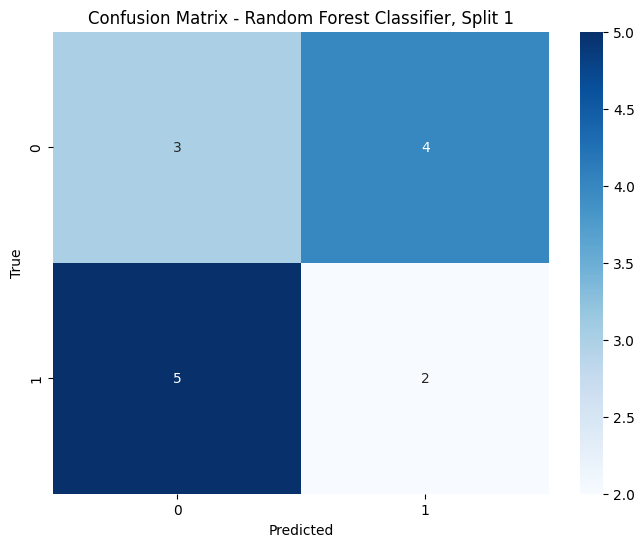

Output for split 2
10 out of 14 predictions correct
Accuracy: 0.7142857142857143
[[5 2]
 [2 5]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.71      0.71      0.71         7

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.71      0.71      0.71        14



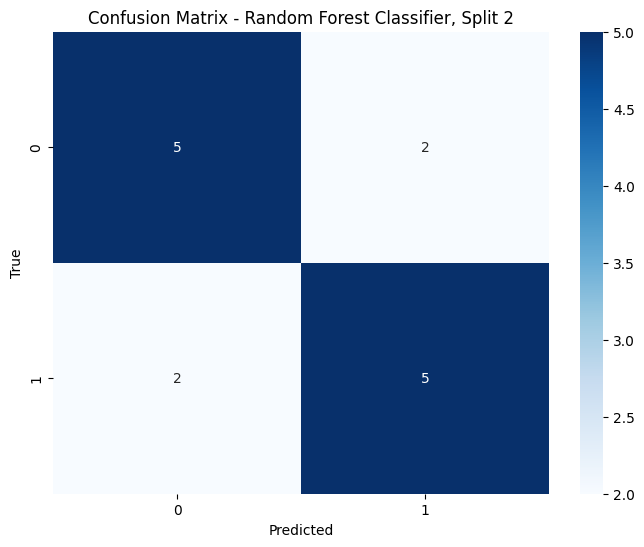

Output for split 3
8 out of 14 predictions correct
Accuracy: 0.5714285714285714
[[2 5]
 [1 6]]
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.55      0.86      0.67         7

    accuracy                           0.57        14
   macro avg       0.61      0.57      0.53        14
weighted avg       0.61      0.57      0.53        14



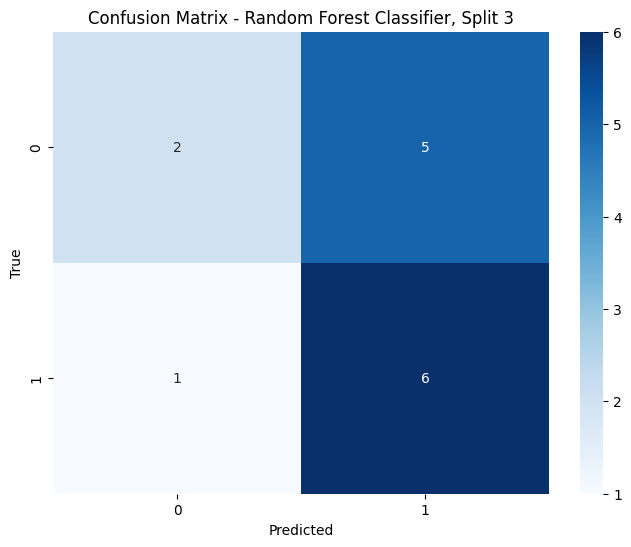

Output for split 4
9 out of 14 predictions correct
Accuracy: 0.6428571428571429
[[5 2]
 [3 4]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.67      0.57      0.62         7

    accuracy                           0.64        14
   macro avg       0.65      0.64      0.64        14
weighted avg       0.65      0.64      0.64        14



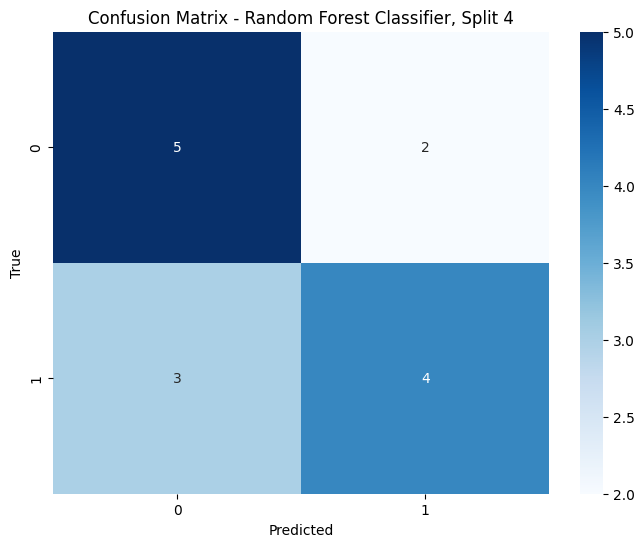

Output for split 5
10 out of 14 predictions correct
Accuracy: 0.7142857142857143
[[4 3]
 [1 6]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.67      0.86      0.75         7

    accuracy                           0.71        14
   macro avg       0.73      0.71      0.71        14
weighted avg       0.73      0.71      0.71        14



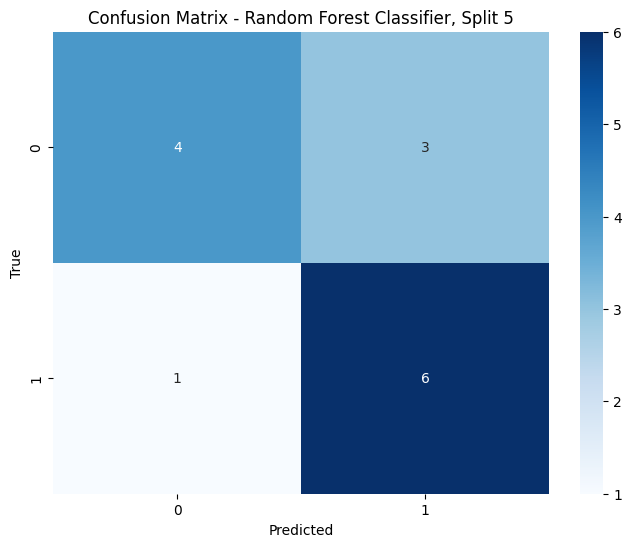

Output for split 6
6 out of 14 predictions correct
Accuracy: 0.42857142857142855
[[2 5]
 [3 4]]
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.44      0.57      0.50         7

    accuracy                           0.43        14
   macro avg       0.42      0.43      0.42        14
weighted avg       0.42      0.43      0.42        14



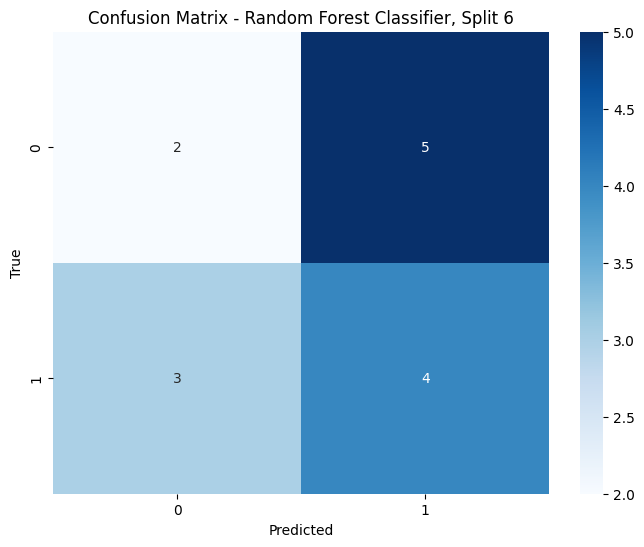

Output for split 7
11 out of 13 predictions correct
Accuracy: 0.8461538461538461
[[6 1]
 [1 5]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.83      0.83      0.83         6

    accuracy                           0.85        13
   macro avg       0.85      0.85      0.85        13
weighted avg       0.85      0.85      0.85        13



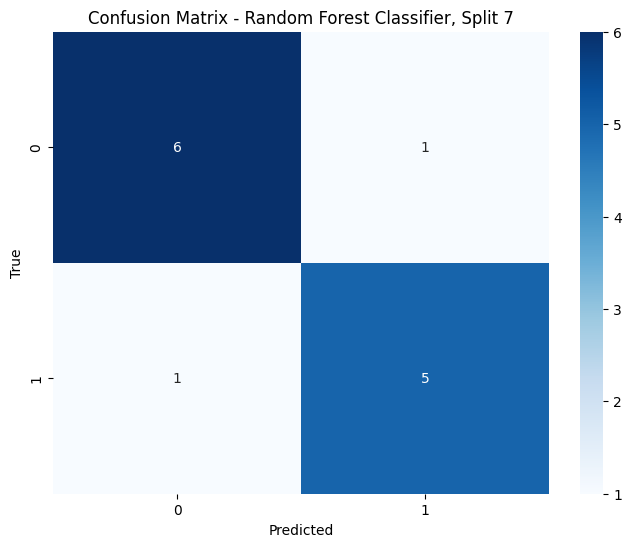

Output for split 8
8 out of 13 predictions correct
Accuracy: 0.6153846153846154
[[4 3]
 [2 4]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.57      0.67      0.62         6

    accuracy                           0.62        13
   macro avg       0.62      0.62      0.62        13
weighted avg       0.62      0.62      0.62        13



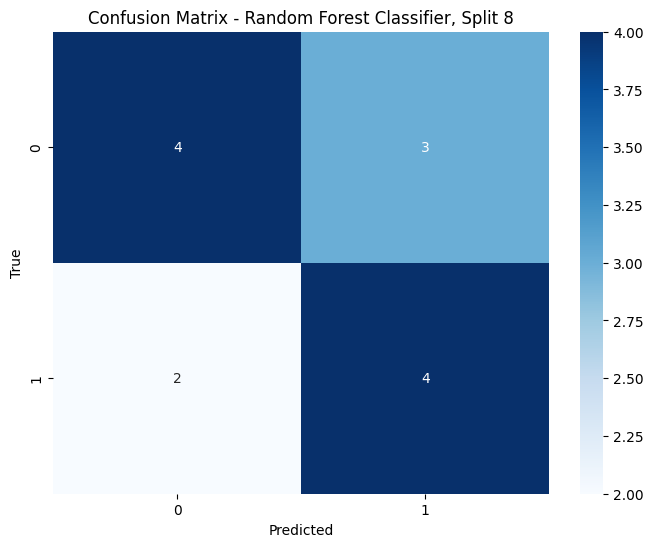

Output for split 9
10 out of 13 predictions correct
Accuracy: 0.7692307692307693
[[5 1]
 [2 5]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



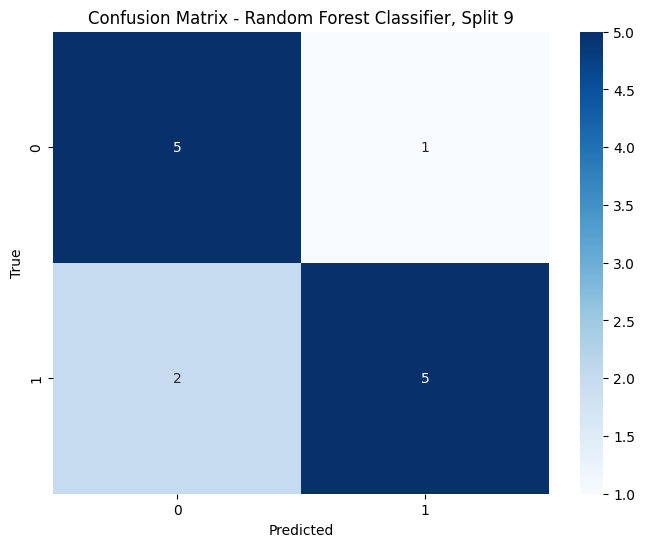

Output for split 10
10 out of 13 predictions correct
Accuracy: 0.7692307692307693
[[5 1]
 [2 5]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



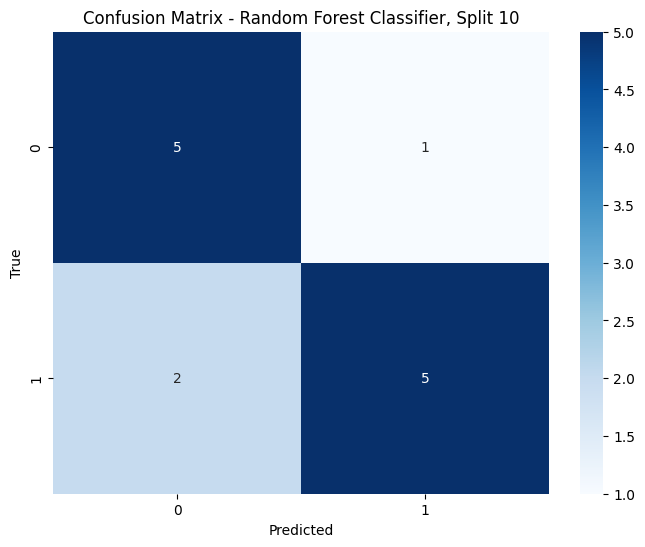

Final mean accuracy: 0.6428571428571429
Best single split accuracy: 0.8461538461538461


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df1 is your DataFrame and 'Suicidal thoughts' is the binary target column
# Class count for 'Suicidal thoughts'
count_class_0, count_class_1 = df1['Suicidal thoughts'].value_counts()

# Divide by class based on 'Suicidal thoughts'
df1_class_0 = df1[df1['Suicidal thoughts'] == 0]
df1_class_1 = df1[df1['Suicidal thoughts'] == 1]

# Optionally, print out the sizes of each class subset to verify
print("Number of entries where 'Suicidal thoughts' is 0:", df1_class_0.shape[0])
print("Number of entries where 'Suicidal thoughts' is 1:", df1_class_1.shape[0])

# Undersample 0-class to match the number of 1-class instances
df1_class_0_under = df1_class_0.sample(count_class_1, random_state=42)

# Concatenate the undersampled DataFrame of 0-class with the 1-class DataFrame
df1_test_under = pd.concat([df1_class_0_under, df1_class_1], axis=0)

# Print the new class distribution to verify undersampling
print('Random under-sampling:')
print(df1_test_under['Suicidal thoughts'].value_counts())

# Prepare features and target
X = df1_test_under.drop('Suicidal thoughts', axis='columns')
y = df1_test_under['Suicidal thoughts']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Output for split {i}")

    # Train the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

# Print final results
print("Final mean accuracy:", np.mean(scores))
print("Best single split accuracy:", np.max(scores))


In [11]:
from sklearn import metrics

# **Method2: Oversampling**

### 📈 Oversampling – Theory

Oversampling is a technique to balance class distribution by **increasing the number of samples** in the minority class.

#### 🔹 How It Works:
- Duplicate existing minority class samples (Random Oversampling), or
- Generate new synthetic samples (e.g., SMOTE).

#### ✅ Pros:
- No information loss from the majority class.
- Improves model sensitivity to minority class.

#### ⚠️ Cons:
- May lead to overfitting if using simple duplication.


In [12]:
# Assuming df1_class_1 is the minority class and df1_class_0 is the majority class

# Oversample class 1 to match the size of class 0
df1_class_1_over = df1_class_1.sample(count_class_0, replace=True, random_state=42)  # Enable replacement to allow for duplication

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df1_test_over = pd.concat([df1_class_0, df1_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df1_test_over = df1_test_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'Suicidal thoughts' to verify oversampling
print('Random over-sampling:')
print(df1_test_over['Suicidal thoughts'].value_counts())


Random over-sampling:
Suicidal thoughts
0    137
1    137
Name: count, dtype: int64


In [13]:
# Verify the structure of the new DataFrame
print(df1_test_over.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             274 non-null    int64
 1   Gender                          274 non-null    int64
 2   Education                       274 non-null    int64
 3   Enjoyable with-                 274 non-null    int64
 4   Live with                       274 non-null    int64
 5   Spend most time                 274 non-null    int64
 6   Failure in life                 274 non-null    int64
 7   Mental/emotional problem        274 non-null    int64
 8   Suicidal thoughts               274 non-null    int64
 9   Family relationship             274 non-null    int64
 10  Financials of family            274 non-null    int64
 11  Addicted person in family       274 non-null    int64
 12  no. of friends                  274 non-null    int64
 13  Withd

In [14]:
X = df1_test_over.drop('Suicidal thoughts',axis='columns')
y = df1_test_over['Suicidal thoughts']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [15]:
# Number of classes in training Data
y_train.value_counts()

,count
Suicidal thoughts,
1,110
0,109


Random over-sampling:
Suicidal thoughts
0    137
1    137
Name: count, dtype: int64
Output for split 1
18 out of 28 predictions correct
Accuracy: 0.6428571428571429
[[ 8  6]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.62      0.71      0.67        14

    accuracy                           0.64        28
   macro avg       0.65      0.64      0.64        28
weighted avg       0.65      0.64      0.64        28



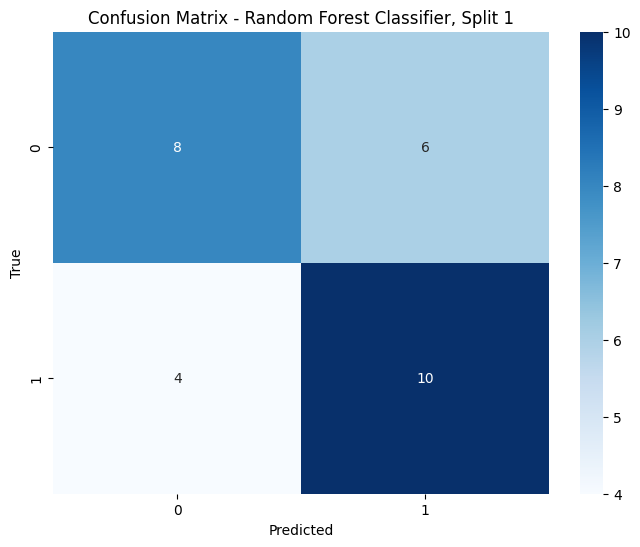

Output for split 2
25 out of 28 predictions correct
Accuracy: 0.8928571428571429
[[11  3]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.82      1.00      0.90        14

    accuracy                           0.89        28
   macro avg       0.91      0.89      0.89        28
weighted avg       0.91      0.89      0.89        28



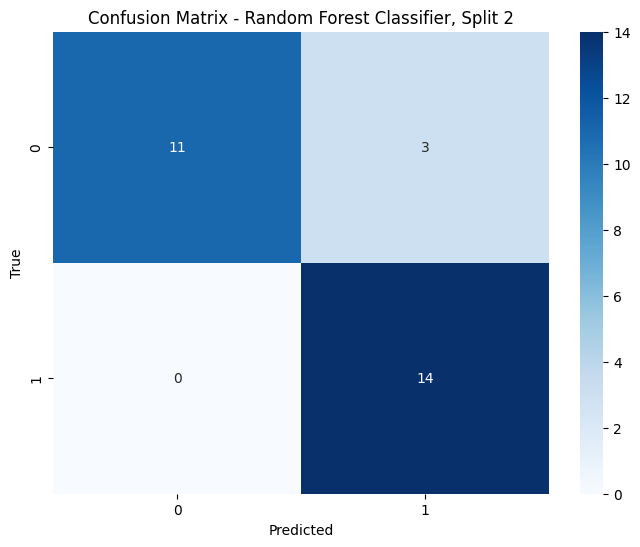

Output for split 3
24 out of 28 predictions correct
Accuracy: 0.8571428571428571
[[10  4]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.78      1.00      0.88        14

    accuracy                           0.86        28
   macro avg       0.89      0.86      0.85        28
weighted avg       0.89      0.86      0.85        28



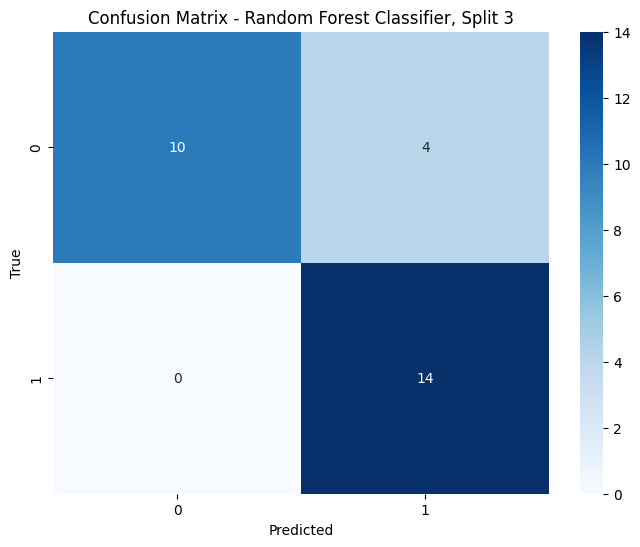

Output for split 4
26 out of 28 predictions correct
Accuracy: 0.9285714285714286
[[12  2]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.88      1.00      0.93        14

    accuracy                           0.93        28
   macro avg       0.94      0.93      0.93        28
weighted avg       0.94      0.93      0.93        28



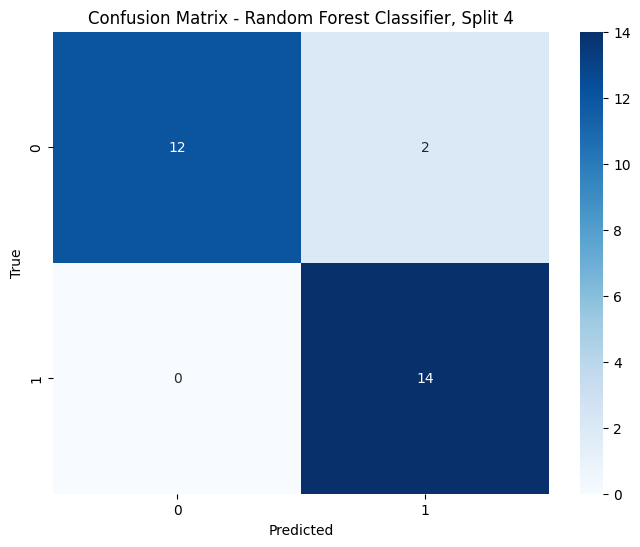

Output for split 5
25 out of 27 predictions correct
Accuracy: 0.9259259259259259
[[12  2]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.87      1.00      0.93        13

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.93        27
weighted avg       0.94      0.93      0.93        27



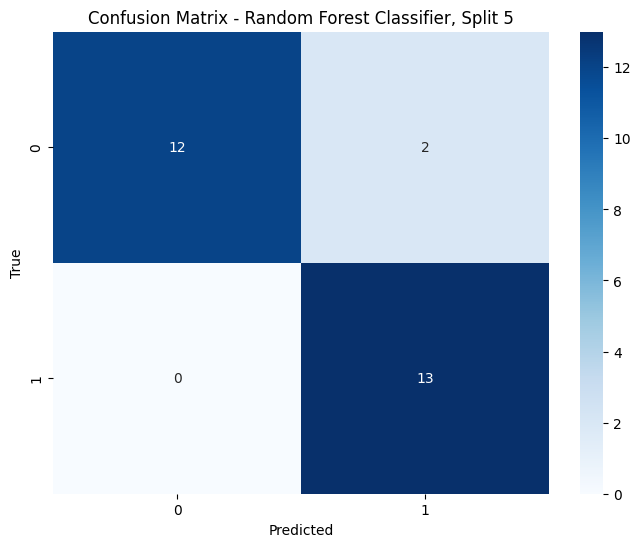

Output for split 6
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[10  4]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.76      1.00      0.87        13

    accuracy                           0.85        27
   macro avg       0.88      0.86      0.85        27
weighted avg       0.89      0.85      0.85        27



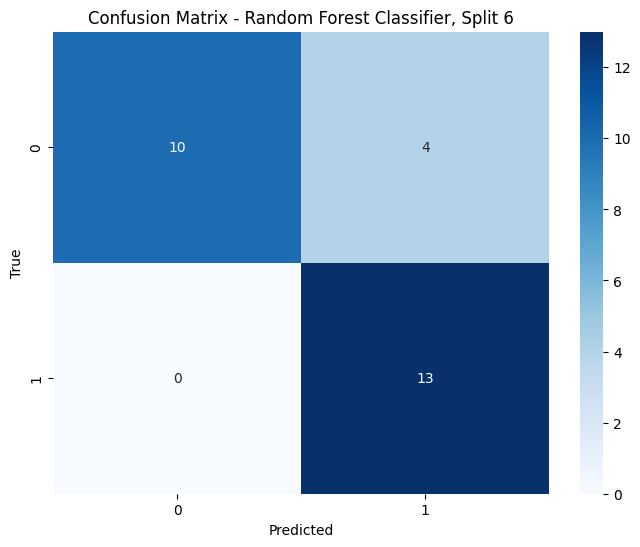

Output for split 7
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[13  1]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.91      0.77      0.83        13

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



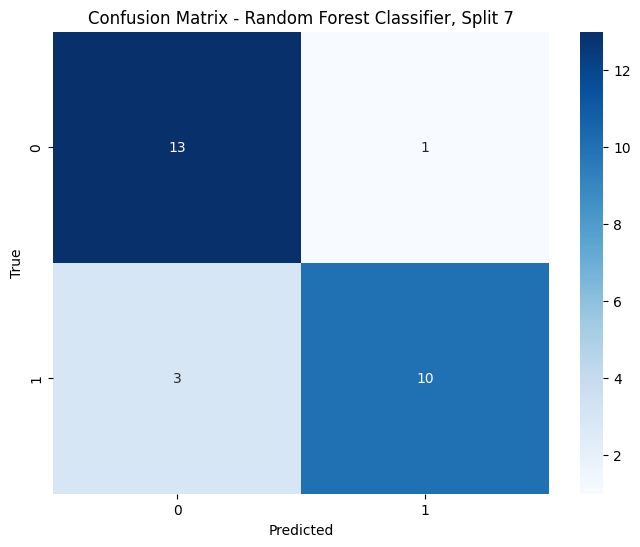

Output for split 8
22 out of 27 predictions correct
Accuracy: 0.8148148148148148
[[10  3]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.80      0.86      0.83        14

    accuracy                           0.81        27
   macro avg       0.82      0.81      0.81        27
weighted avg       0.82      0.81      0.81        27



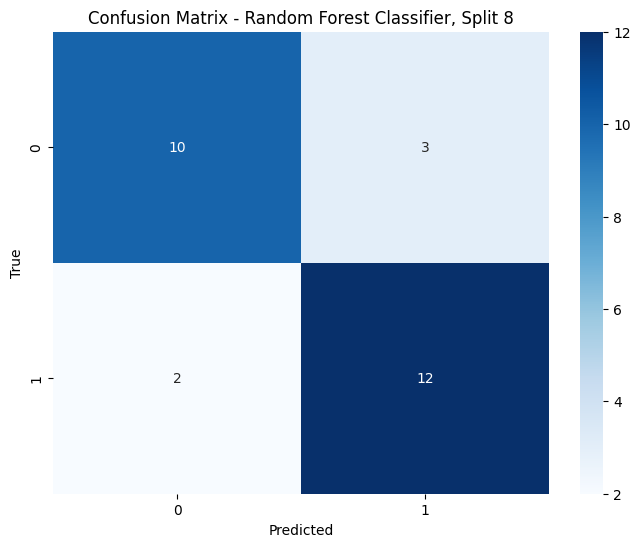

Output for split 9
26 out of 27 predictions correct
Accuracy: 0.9629629629629629
[[13  0]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.96        14

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



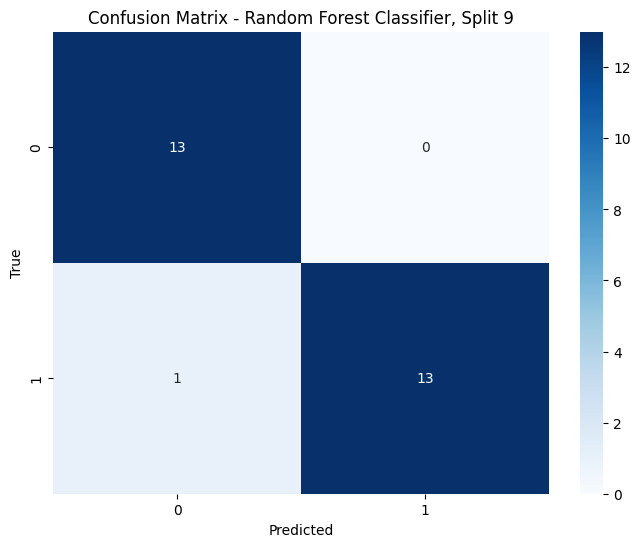

Output for split 10
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[12  1]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.92      0.79      0.85        14

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



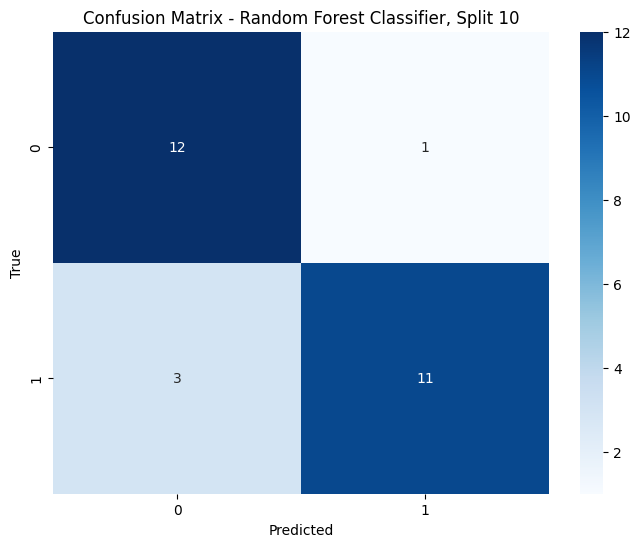

Final mean accuracy: 0.8580687830687831
Best single split accuracy: 0.9629629629629629


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df1_class_1 is the minority class and df1_class_0 is the majority class
# Oversample class 1 to match the size of class 0
df1_class_1_over = df1_class_1.sample(count_class_0, replace=True, random_state=42)  # Enable replacement to allow for duplication

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df1_test_over = pd.concat([df1_class_0, df1_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df1_test_over = df1_test_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'Suicidal thoughts' to verify oversampling
print('Random over-sampling:')
print(df1_test_over['Suicidal thoughts'].value_counts())

# Prepare features and target
X = df1_test_over.drop('Suicidal thoughts', axis='columns')
y = df1_test_over['Suicidal thoughts']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Output for split {i}")

    # Train the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

# Print final results
print("Final mean accuracy:", np.mean(scores))
print("Best single split accuracy:", np.max(scores))


# **Method3: SMOTE**

In [17]:
 pip install imbalanced-learn

In [18]:
df2 = pd.get_dummies(data=df1)
df2.columns

Index(['Age', 'Gender', 'Education', 'Enjoyable with-', 'Live with',
       'Spend most time', 'Failure in life', 'Mental/emotional problem',
       'Suicidal thoughts', 'Family relationship', 'Financials of family',
       'Addicted person in family', 'no. of friends', 'Withdrawal symptoms',
       'friends? houses at night', 'Satisfied with workplace', 'Case in court',
       'Living with drug user', 'Smoking', 'Ever taken drug',
       'Friends influence', 'If chance given to taste drugs',
       'Easy to control use of drug', 'Frequency of drug usage'],
      dtype='object')

In [19]:
X = df2.drop('Suicidal thoughts',axis='columns')
y = df2['Suicidal thoughts']

### 💡 SMOTE (Synthetic Minority Over-sampling Technique) – Theory

SMOTE is a powerful technique used to address **class imbalance** in classification problems, where one class (the *minority class*) has significantly fewer samples than the other (the *majority class*).

---

#### 🔍 Objective:
To generate **synthetic data points** for the minority class so that it has a more balanced representation compared to the majority class. This helps machine learning models learn better and avoid being biased toward the majority class.

---

#### ⚙️ How SMOTE Works:
1. **Select a minority class sample** at random.
2. **Find its k-nearest neighbors** (typically `k=5`) within the same class.
3. **Randomly select one neighbor** and compute the difference between the selected sample and its neighbor.
4. **Multiply this difference by a random number** between 0 and 1, and **add it to the original sample** to create a synthetic sample.
5. Repeat the process until the desired number of synthetic samples is created.

---

#### 📌 Characteristics:
- Generates **new, unique samples** (not duplicates).
- Helps **reduce overfitting** caused by random oversampling.
- Works best with **numerical data** (for mixed data, use `SMOTENC` or similar).

---

#### ✅ Benefits:
- Balances the dataset.
- Improves model performance on minority classes.
- Easy to integrate with common machine learning workflows.


### ⚖️ Understanding SMOTE with a Real-Life Analogy

Imagine you're organizing a sports team, and you want a balanced group of **boys and girls**.

- You have:
  - ✅ 10 boys
  - ❌ Only 2 girls

This is **imbalanced**, just like an imbalanced dataset where one class has many samples and another has very few.

---

### 🧠 The Problem:
If the coach (your ML model) trains with mostly boys, they might assume **only boys are players** — this creates a bias.

---

### 🎯 SMOTE to the Rescue:

Instead of just copying the 2 girls over and over (random oversampling), SMOTE creates **new, realistic "synthetic" girls** by blending the traits of the existing ones.

---

### 👧 Example:

- Girl A: 5'4", fast, good at passing  
- Girl B: 5'6", moderate speed, good at shooting

SMOTE might create a **new girl** who is:  
➡️ 5'5", fast, good at both passing and shooting  

She isn’t a clone — she’s a **smart combination** of A and B.

---

### 🔬 In Data Terms:

- **Girl A and B** = real minority class samples  
- **New Girl** = synthetic data point (interpolated using SMOTE)

---

### ✅ Final Result:

You now have:
- 10 boys  
- 10 girls (2 real + 8 realistic, synthetic)

This balances the dataset and helps the ML model train fairly on both classes.



In [20]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE
X_sm, y_sm = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print(y_sm.value_counts())


Suicidal thoughts
1    137
0    137
Name: count, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [22]:
# Number of classes in training Data
y_train.value_counts()

,count
Suicidal thoughts,
1,110
0,109


Output for split 1
26 out of 41 predictions correct
Accuracy: 0.6341463414634146
[[17 10]
 [ 5  9]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69        27
           1       0.47      0.64      0.55        14

    accuracy                           0.63        41
   macro avg       0.62      0.64      0.62        41
weighted avg       0.67      0.63      0.64        41



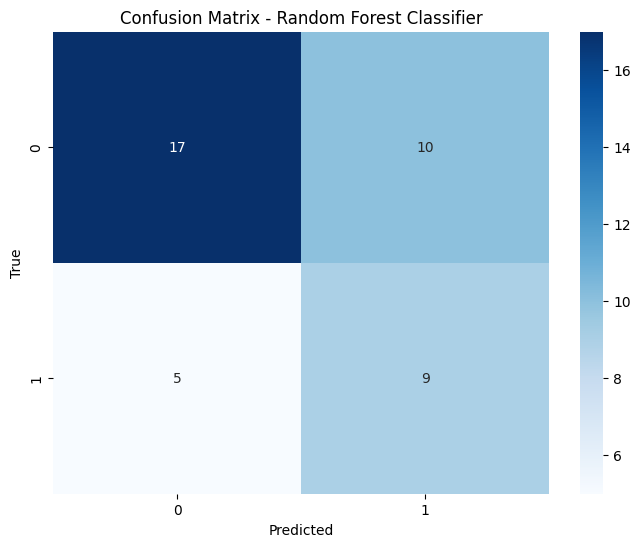

Output for split 2
28 out of 41 predictions correct
Accuracy: 0.6829268292682927
[[19  8]
 [ 5  9]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.53      0.64      0.58        14

    accuracy                           0.68        41
   macro avg       0.66      0.67      0.66        41
weighted avg       0.70      0.68      0.69        41



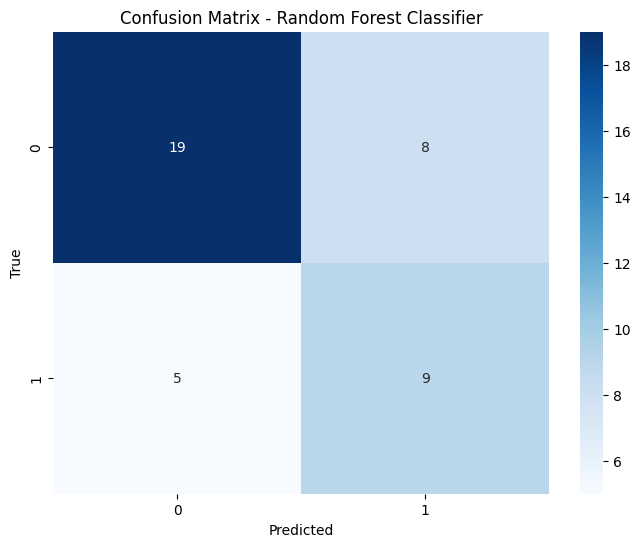

Output for split 3
29 out of 41 predictions correct
Accuracy: 0.7073170731707317
[[23  4]
 [ 8  6]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.60      0.43      0.50        14

    accuracy                           0.71        41
   macro avg       0.67      0.64      0.65        41
weighted avg       0.69      0.71      0.69        41



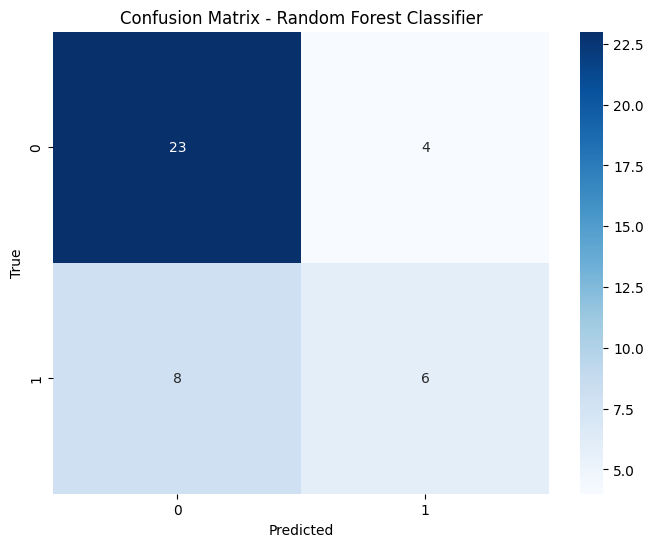

Output for split 4
31 out of 41 predictions correct
Accuracy: 0.7560975609756098
[[25  3]
 [ 7  6]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.67      0.46      0.55        13

    accuracy                           0.76        41
   macro avg       0.72      0.68      0.69        41
weighted avg       0.74      0.76      0.74        41



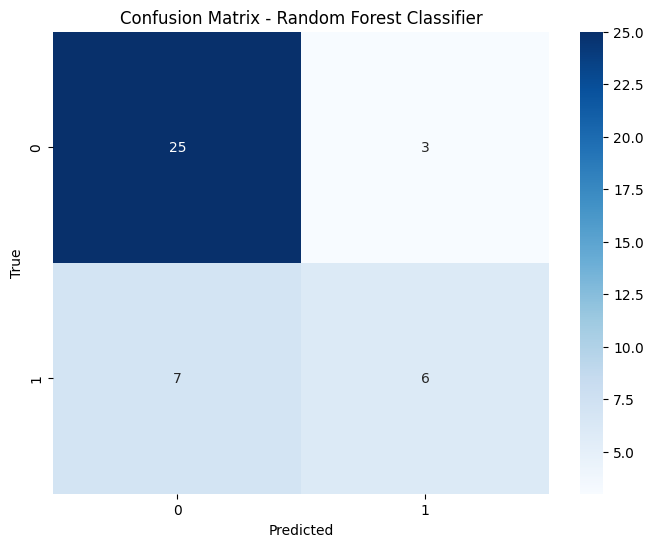

Output for split 5
28 out of 41 predictions correct
Accuracy: 0.6829268292682927
[[23  5]
 [ 8  5]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.50      0.38      0.43        13

    accuracy                           0.68        41
   macro avg       0.62      0.60      0.61        41
weighted avg       0.67      0.68      0.67        41



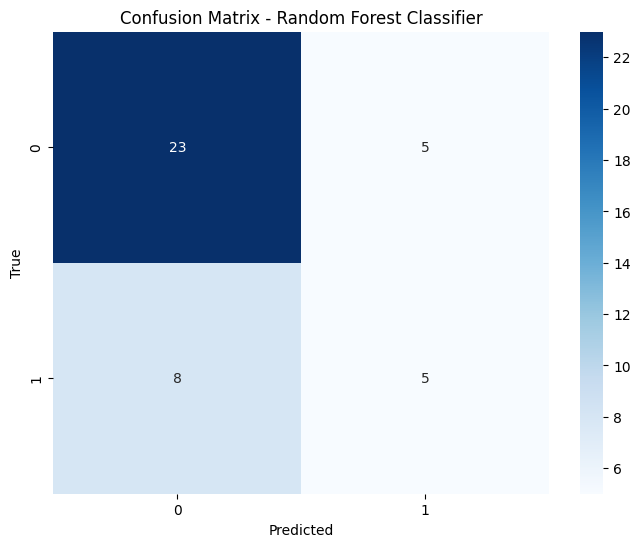

Final mean result: 0.6926829268292682
Best accuracy: 0.7560975609756098


In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

# Assuming X and y are defined as:
# X = df2.drop('Suicidal thoughts', axis='columns')
# y = df2['Suicidal thoughts']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority')

if __name__ == "__main__":
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    accuracies = []  # To store accuracy for each fold

    for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE to the training data only
        X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

        print(f"Output for split {i}")

        clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
        clf.fit(X_train_sm, y_train_sm)  # Train on the resampled train set
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
        print("Accuracy:", accuracy)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix - Random Forest Classifier')
        plt.show()

    print("Final mean result:", np.mean(accuracies))
    print("Best accuracy:", np.max(accuracies))
